# K Nearest Neighbors 

<img class="irc_mi" src="http://cdn.iopscience.com/images/1742-5468/2010/11/P11015/Full/7185704.jpg" onload="google.aft&amp;&amp;google.aft(this)" width="366" height="367" style="margin-top: 1px;" alt="Image result for k nearest neighbor">

Conceptually, KNN is very simple. Given a dataset for which class labels are known, you want to predict the class of a new data point.

The strategy is to compare the new observation to those observations already labeled. The predicted class will be based on the known classes of the nearest k neighbors (i.e. based on the class labels of the other data points most similar to the one you're trying to predict).

Let's take a look at the Wine Data Set from the UCI Machine Learn Repo. Each record consists of some metadata about a particular wine, including the color of the wine (red/white). We're going to use density, sulphates, and residual_sugar to predict color. Using scikit-learn, we can vary the parameter n_neighbors by just looping through a range of values, calculating the accuracy against a holdout set, and then plotting the results.

In [13]:
import pandas as pd
import pylab as pl
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

df = pd.read_csv("https://s3.amazonaws.com/demo-datasets/wine.csv")
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,is_red,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0


Neighbors: 1, Accuracy: 0.753276
Neighbors: 3, Accuracy: 0.768377
Neighbors: 5, Accuracy: 0.778148
Neighbors: 7, Accuracy: 0.784366
Neighbors: 9, Accuracy: 0.785032
Neighbors: 11, Accuracy: 0.790140
Neighbors: 13, Accuracy: 0.792139
Neighbors: 15, Accuracy: 0.791917
Neighbors: 17, Accuracy: 0.791250
Neighbors: 19, Accuracy: 0.794581
Neighbors: 21, Accuracy: 0.796580
Neighbors: 23, Accuracy: 0.798357
Neighbors: 25, Accuracy: 0.798135
Neighbors: 27, Accuracy: 0.799689
Neighbors: 29, Accuracy: 0.799689
Neighbors: 31, Accuracy: 0.799467
Neighbors: 33, Accuracy: 0.800133
Neighbors: 35, Accuracy: 0.800355
Neighbors: 37, Accuracy: 0.800577
Neighbors: 39, Accuracy: 0.801466
Neighbors: 41, Accuracy: 0.801244
Neighbors: 43, Accuracy: 0.801244
Neighbors: 45, Accuracy: 0.801244
Neighbors: 47, Accuracy: 0.801244
Neighbors: 49, Accuracy: 0.801244


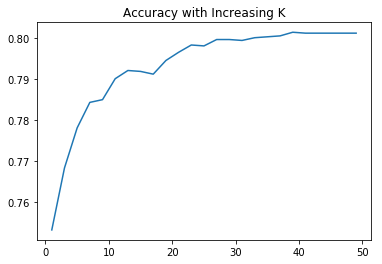

In [15]:
test_idx = np.random.uniform(0, 1, len(df)) <= 0.3
train = df[test_idx==True]
test = df[test_idx==False]

features = ['density', 'sulphates', 'residual_sugar']

results = []
for n in range(1, 51, 2):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(train[features], train['high_quality'])
    preds = clf.predict(test[features])
    accuracy = np.where(preds==test['high_quality'], 1, 0).sum() / float(len(test))
    print ("Neighbors: %d, Accuracy: %3f" % (n, accuracy))

    results.append([n, accuracy])

results = pd.DataFrame(results, columns=["n", "accuracy"])

pl.plot(results.n, results.accuracy)
pl.title("Accuracy with Increasing K")
pl.show()

### Calculating the Neighbors

you can also modify how you calculate the distance between points. The most natural way to think about calculating distance (and the method that I used in the red/blue dots example) is by weighting each of the K nearest points equally in the voting. This might be egalitarian but in many instances it doesn't really make sense. Why should the 13th closest point get an equal vote to the 1st nearest point.

Using scikit-learn you can change the way you calculate distance using the weights parameter. We have two weighting functions out of the box: uniform, which weights everything equally, and distance, which weights points by the inverse of their distance.

In [21]:
results = []
for w in ['uniform', 'distance']:
    clf = KNeighborsClassifier(3, weights=w)
    w = str(w)
    clf.fit(train[features], train['high_quality'])
    preds = clf.predict(test[features])
    accuracy = np.where(preds==test['high_quality'], 1, 0).sum() / float(len(test))
    print ("Weights: %s, Accuracy: %3f" % (w, accuracy))

    results.append([w, accuracy])

results = pd.DataFrame(results, columns=["weight_method", "accuracy"])
print(results)

Weights: uniform, Accuracy: 0.768377
Weights: distance, Accuracy: 0.763713
  weight_method  accuracy
0       uniform  0.768377
1      distance  0.763713
